# Ex Chap_8 Credit Card Fraud Detection via Dimension Reduction

Dataset:[kaggle Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_import = pd.read_csv('../../data_local/creditcard.csv') # large file 150MB

In [3]:
data_import

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
unused = data_import[["Time","Amount"]]
X = data_import.iloc[:,1:-2] # remove the first "time" and last "amount" "class" columns
y = data_import["Class"]
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [5]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=10) # 10 components
X10D = pca.fit_transform(X) # numpy form ugly
X10D = pd.DataFrame(X10D)
X10D

,0,1,2,3,4,5,6,7,8,9
0,1.359965,0.072510,-2.536612,1.377881,0.331775,0.458465,0.251486,-0.109744,0.369580,-0.030526
1,-1.191905,-0.265501,-0.165786,0.448192,-0.055297,-0.078722,-0.098342,-0.073541,-0.271844,0.122491
2,1.358133,1.340559,-1.773319,0.381041,0.508220,1.808433,0.766327,-0.243968,-1.512483,-0.321359
3,0.965947,0.185774,-1.793791,-0.862637,0.015937,1.255153,0.224613,-0.371023,-1.380365,-0.008649
4,1.158464,-0.878802,-1.549985,0.402816,0.393210,0.087440,0.631697,0.241821,0.858046,-0.638138
...,...,...,...,...,...,...,...,...,...,...
284802,11.880835,-10.071386,9.834457,-2.065676,5.374040,-2.597037,-4.976002,-7.272044,2.019473,-4.545647
284803,0.732615,0.055025,-2.035915,-0.737853,-0.867823,1.062208,0.018426,-0.292090,0.558685,0.979947
284804,-1.919457,0.300952,3.249765,-0.558078,-2.634108,3.026873,-0.293347,-0.710634,0.417655,0.522449
284805,0.240600,-0.531467,-0.703605,0.689542,0.367045,0.616877,-0.660035,-0.693090,0.390779,0.476166


In [8]:
# 95 %  explained variance ratio 
pca = PCA()
XD = pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)
d

21

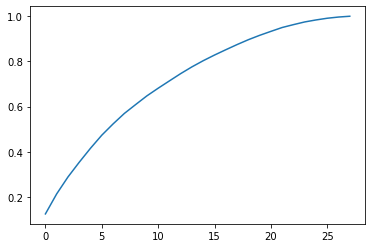

In [9]:
_, ax = plt.subplots(figsize =(6,4))

ax = plt.plot(cumsum)

PCA can be used to compress the amount of information that has to be plotted. 

Let's say that you perform PCA and take in all the components that constitute 95% of the variance in the dataset.You can then take those PCA's and inverse transform them to get something close to the origina data. 

- The 5% that you'll be missing is part of the **reconstruction error**.

In [10]:
pca = PCA(n_components=10)  # 10 components
X10D = pca.fit_transform(X)  # numpy form ugly
X10D = pd.DataFrame(X10D)
X10D_inverse = pca.inverse_transform(X10D)
X10D_inverse = pd.DataFrame(X10D_inverse)
X10D_inverse

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-1.360132,-0.074059,2.538237,1.379710,-0.334070,0.465728,0.231860,0.099362,0.386617,0.119749,...,-0.007267,0.009446,-0.004775,0.011096,-0.001723,0.000545,0.000132,-0.000072,0.000005,-4.950038e-06
1,1.192223,0.267302,0.164796,0.446688,0.056659,-0.086339,-0.075467,0.080748,-0.269915,-0.174973,...,0.004521,-0.006613,0.003970,-0.006629,0.001128,-0.000217,-0.000122,0.000100,-0.000001,3.260462e-06
2,-1.360087,-1.346146,1.781133,0.387089,-0.482421,1.820123,0.757371,0.262849,-1.376484,0.337881,...,0.010573,-0.012594,0.006802,-0.015745,-0.000574,0.000799,-0.000222,0.000335,0.000023,-1.314492e-09
3,-0.967274,-0.188485,1.796642,-0.859825,0.000825,1.256686,0.221794,0.385667,-1.314357,0.017008,...,0.012840,-0.016572,0.009255,-0.018947,0.000986,0.000242,-0.000378,0.000357,0.000012,4.470553e-06
4,-1.158928,0.875176,1.552384,0.406091,-0.399190,0.103665,0.579031,-0.266153,0.864012,0.803043,...,-0.016695,0.025237,-0.015354,0.024511,-0.004773,0.001381,0.000547,-0.000378,0.000018,-1.400700e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.880384,10.074565,-9.838873,-2.069606,-5.372588,-2.616328,-4.903926,7.296962,1.841106,4.271328,...,-0.068778,0.104065,-0.063394,0.099943,-0.019975,0.004666,0.001048,-0.000927,0.000014,-4.785123e-05
284803,-0.734082,-0.058944,2.039526,-0.734295,0.880793,1.072246,0.009591,0.312037,0.675378,-0.906221,...,-0.002670,-0.003348,0.005819,0.004606,0.002037,-0.001428,-0.000236,0.000120,-0.000028,5.280542e-06
284804,1.919040,-0.302964,-3.247034,-0.555369,2.636147,3.037429,-0.303534,0.714767,0.469900,-0.450164,...,-0.008413,0.006324,-0.000452,0.013435,-0.000157,-0.000859,-0.000075,0.000090,-0.000027,-9.873574e-08
284805,-0.240149,0.531169,0.701992,0.688906,-0.380899,0.620831,-0.685275,0.673043,0.362107,-0.420296,...,-0.003331,0.001205,0.001240,0.005495,0.000812,-0.000526,-0.000224,0.000104,-0.000020,2.693564e-06


In [11]:
X10D # compare

,0,1,2,3,4,5,6,7,8,9
0,1.360124,0.073986,-2.538173,1.379783,0.333908,0.465707,0.232142,-0.099160,0.379489,0.143059
1,-1.192221,-0.267292,-0.164810,0.446723,-0.056897,-0.086162,-0.075973,-0.080958,-0.259193,-0.190721
2,1.360090,1.346155,-1.781228,0.387261,0.482362,1.820628,0.755777,-0.263527,-1.394405,0.255413
3,0.967279,0.188502,-1.796741,-0.859724,-0.000773,1.257180,0.220050,-0.386439,-1.313155,-0.060882
4,1.158918,-0.875261,-1.552263,0.406074,0.399457,0.103217,0.580864,0.266936,0.815248,0.852914
...,...,...,...,...,...,...,...,...,...,...
284802,11.880367,-10.074626,9.839411,-2.069765,5.376219,-2.622792,-4.893115,-7.294767,1.594492,4.381467
284803,0.734078,0.058893,-2.039485,-0.734455,-0.880491,1.072647,0.008698,-0.312097,0.728662,-0.863781
284804,-1.919049,0.302918,3.247299,-0.556216,-2.634719,3.038070,-0.304771,-0.715022,0.498347,-0.418737
284805,0.240146,-0.531202,-0.701934,0.688909,0.381096,0.620560,-0.685474,-0.673129,0.387733,-0.396646


If you have a lot of dimensions in your PCA then you might want to take a stochastic approach where the computer will try and estimate your PCAs instead of calculating them. 

You can do thisby setting the `svd_ solver` hyperparameter of the `PCA` clags to `randomized`. By default, this hyperparameter is set to `auto` which means that skLearn will run the full PCA unless the amountof dimensions is too high. You can force it to run the full PCA by setting the `svd_ solver` hyperparameter to `full`.

PCAs work only if the whole training dataset fits into memory. Luckily you can run the PCAincrementally using the `Incremental PCA` class.

More work:

1. imbalanced data

2. confusion matrix

In [12]:
### Compare KernelPCA with LogisticRegression

# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import KernelPCA

In [13]:
# clf = Pipeline([
#     ("kpca",KernelPCA(n_components=2)),
#     ("log_reg",LogisticRegression())
# ])

# param_grid = [{
#     "kpca__gamma":np.linspace(0.03,0.05,10),
#     "kpca__kernel":["rbf","sigmoid"]
# }]

In [14]:
# grid_search = GridSearchCV(clf, param_grid, cv=3)
# grid_search.fit(X,y) ## >6min

In [15]:
# print(grid_search.best_params_)